# Homework Final

In [1]:
source("./database.R")
source("./getdata.R")
source("./getstats.R")
source("./pred.R")
source("./getreturn.R")

Warning message:
"程辑包'dplyr'是用R版本4.1.2 来建造的"

载入程辑包：'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"程辑包'latex2exp'是用R版本4.1.3 来建造的"


In [2]:
inst = "GE"
syms = c("GEH1","GEM1","GEU1","GEZ1","GEH2","GEM2","GEU2","GEZ2")
syms.str = paste0(paste0('"',syms,'"'),collapse=";")
ge.info = h("select from instinfo where inst=`GE")
tick.size = ge.info$minpxincr

In [3]:
tick.size

[1] 0.5

In [4]:
dates.all = h("select date from trade") %>% format(.,"%Y.%m.%d")
dates.all = as.vector(dates.all$date)

In [5]:
q1 = sprintf('select sumsiz:sum siz 
              by sym 
              from trade 
              where any sym like/: (%s),
                        date within (2020.10.05,2020.10.30)',syms.str)
trade.vols = h(q1)
trade.vols

sym,sumsiz
<chr>,<int>
GEH1,582681
GEH2,881320
GEM1,641851
GEM2,694038
GEU1,784911
GEU2,619810
GEZ1,856118
GEZ2,679395


In [6]:
dsec = 60
pmids= get.pmids.rearrange(dates.all[1:3],syms,dsec=dsec)

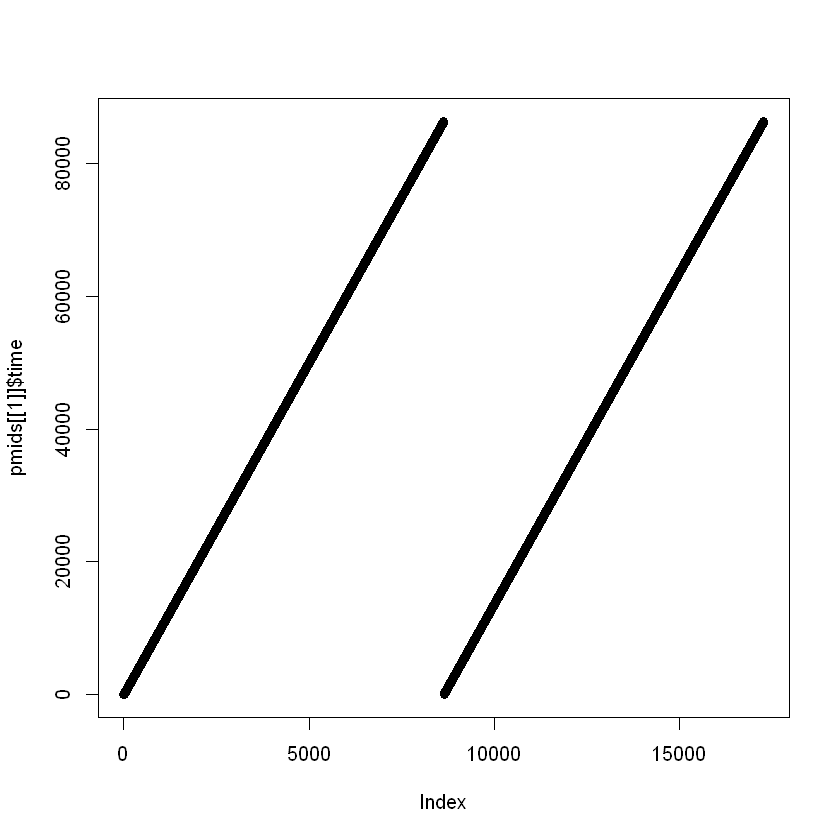

In [7]:
plot(pmids[[1]]$time)

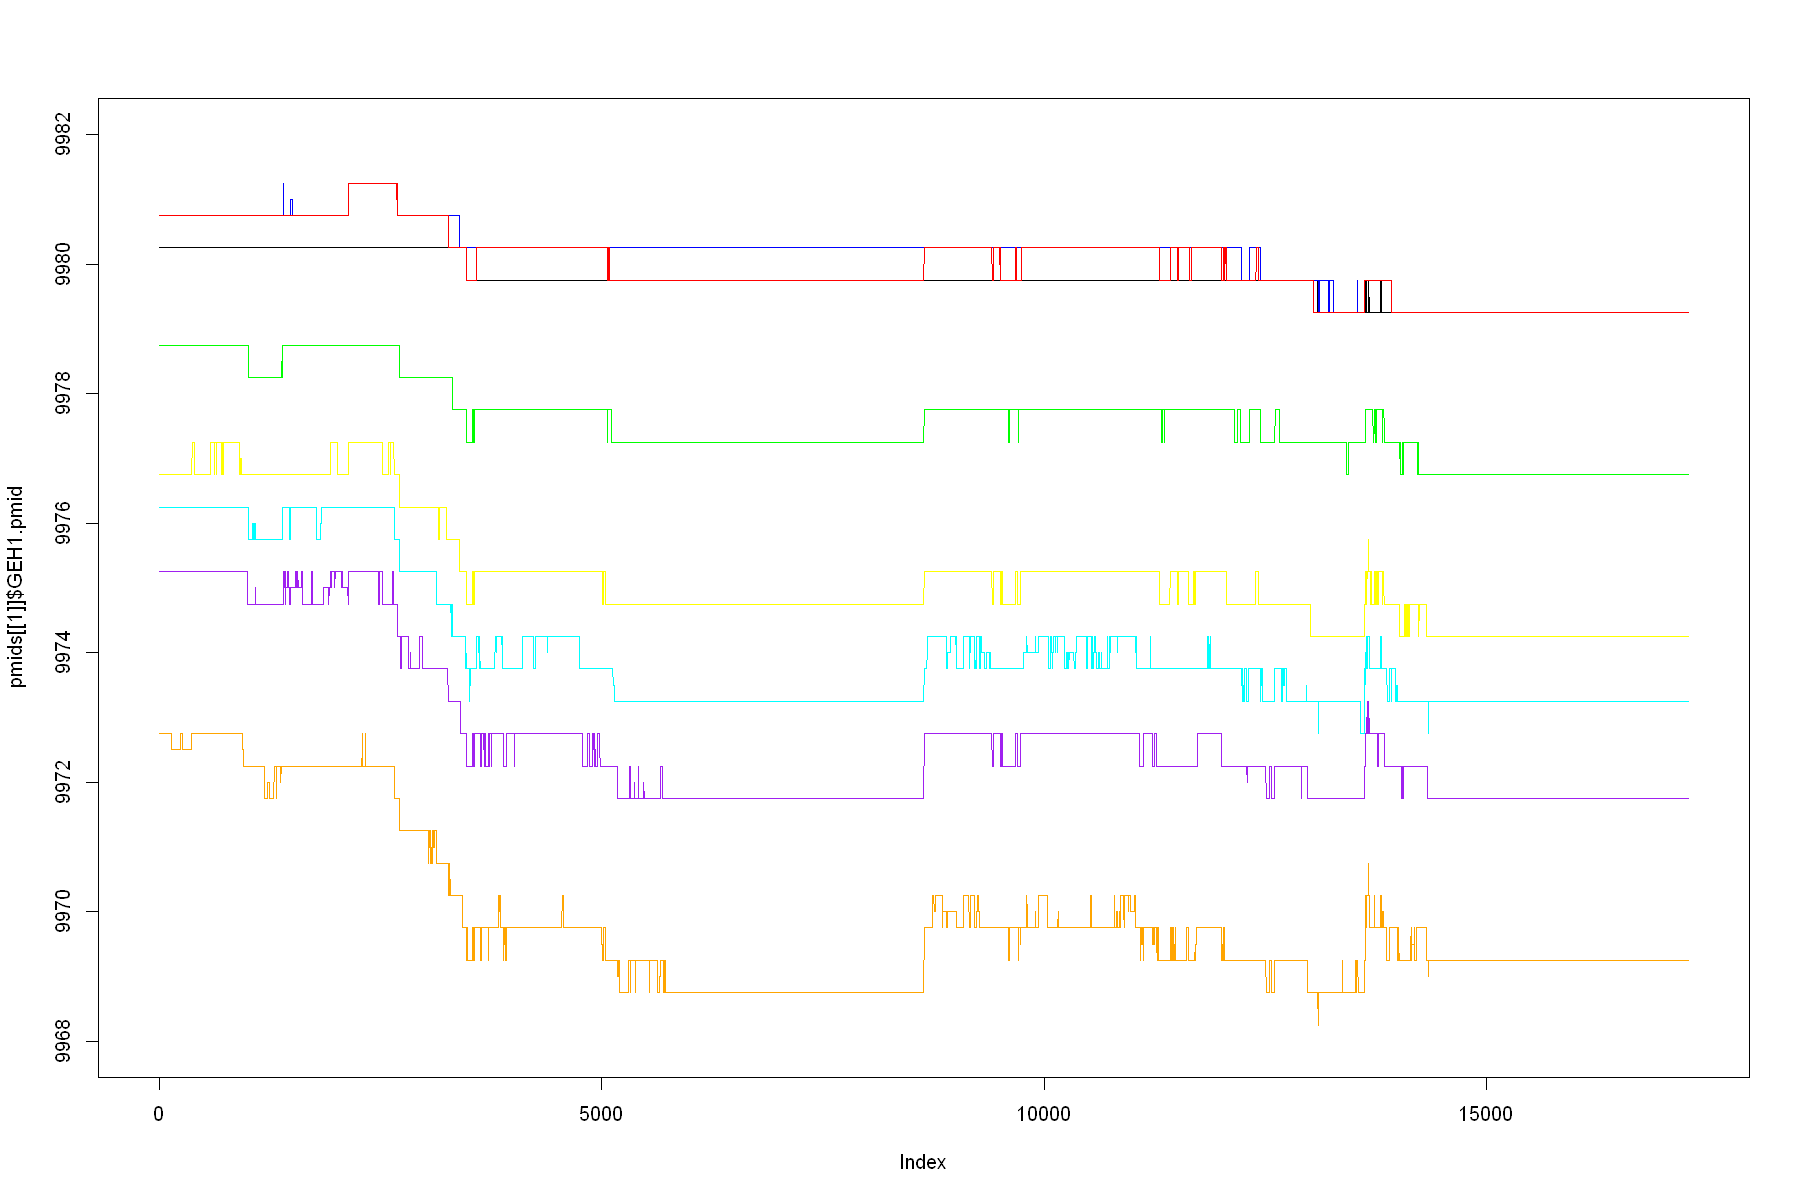

In [8]:
options(repr.plot.width=15,repr.plot.height=10)
plot(pmids[[1]]$GEH1.pmid,col="black",type="l",ylim=c(9968,9982))
lines(pmids[[1]]$GEM1.pmid,col="blue")
lines(pmids[[1]]$GEU1.pmid,col="red")
lines(pmids[[1]]$GEZ1.pmid,col="green")
lines(pmids[[1]]$GEH2.pmid,col="yellow")
lines(pmids[[1]]$GEM2.pmid,col="cyan")
lines(pmids[[1]]$GEU2.pmid,col="purple")
lines(pmids[[1]]$GEZ2.pmid,col="orange")

In [9]:
stat.T = 3600
pmids = pmids.stats(pmids,"exponential",as.integer(stat.T/dsec))

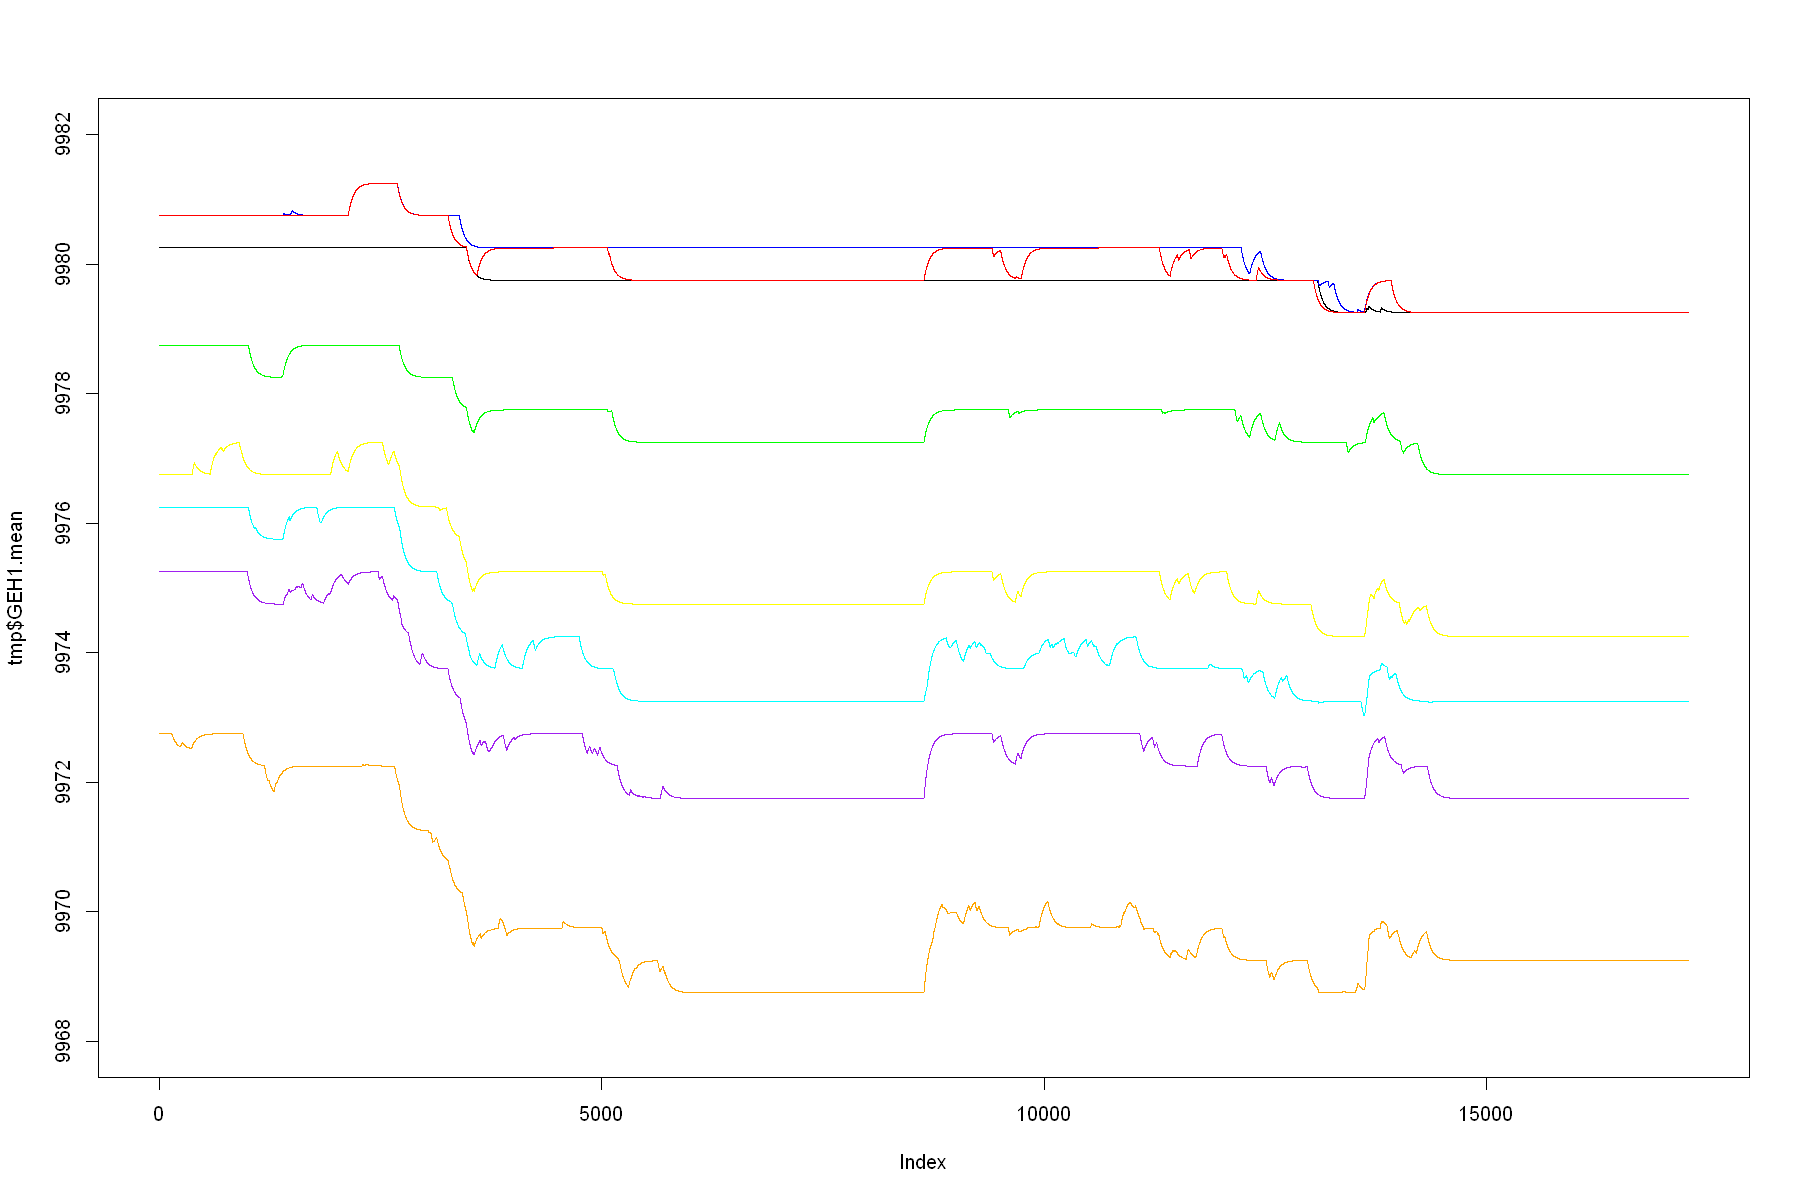

In [10]:
tmp = pmids[[1]]
options(repr.plot.width=15,repr.plot.height=10)
plot(tmp$GEH1.mean,col="black",type="l",ylim=c(9968,9982))
lines(tmp$GEM1.mean,col="blue")
lines(tmp$GEU1.mean,col="red")
lines(tmp$GEZ1.mean,col="green")
lines(tmp$GEH2.mean,col="yellow")
lines(tmp$GEM2.mean,col="cyan")
lines(tmp$GEU2.mean,col="purple")
lines(tmp$GEZ2.mean,col="orange")

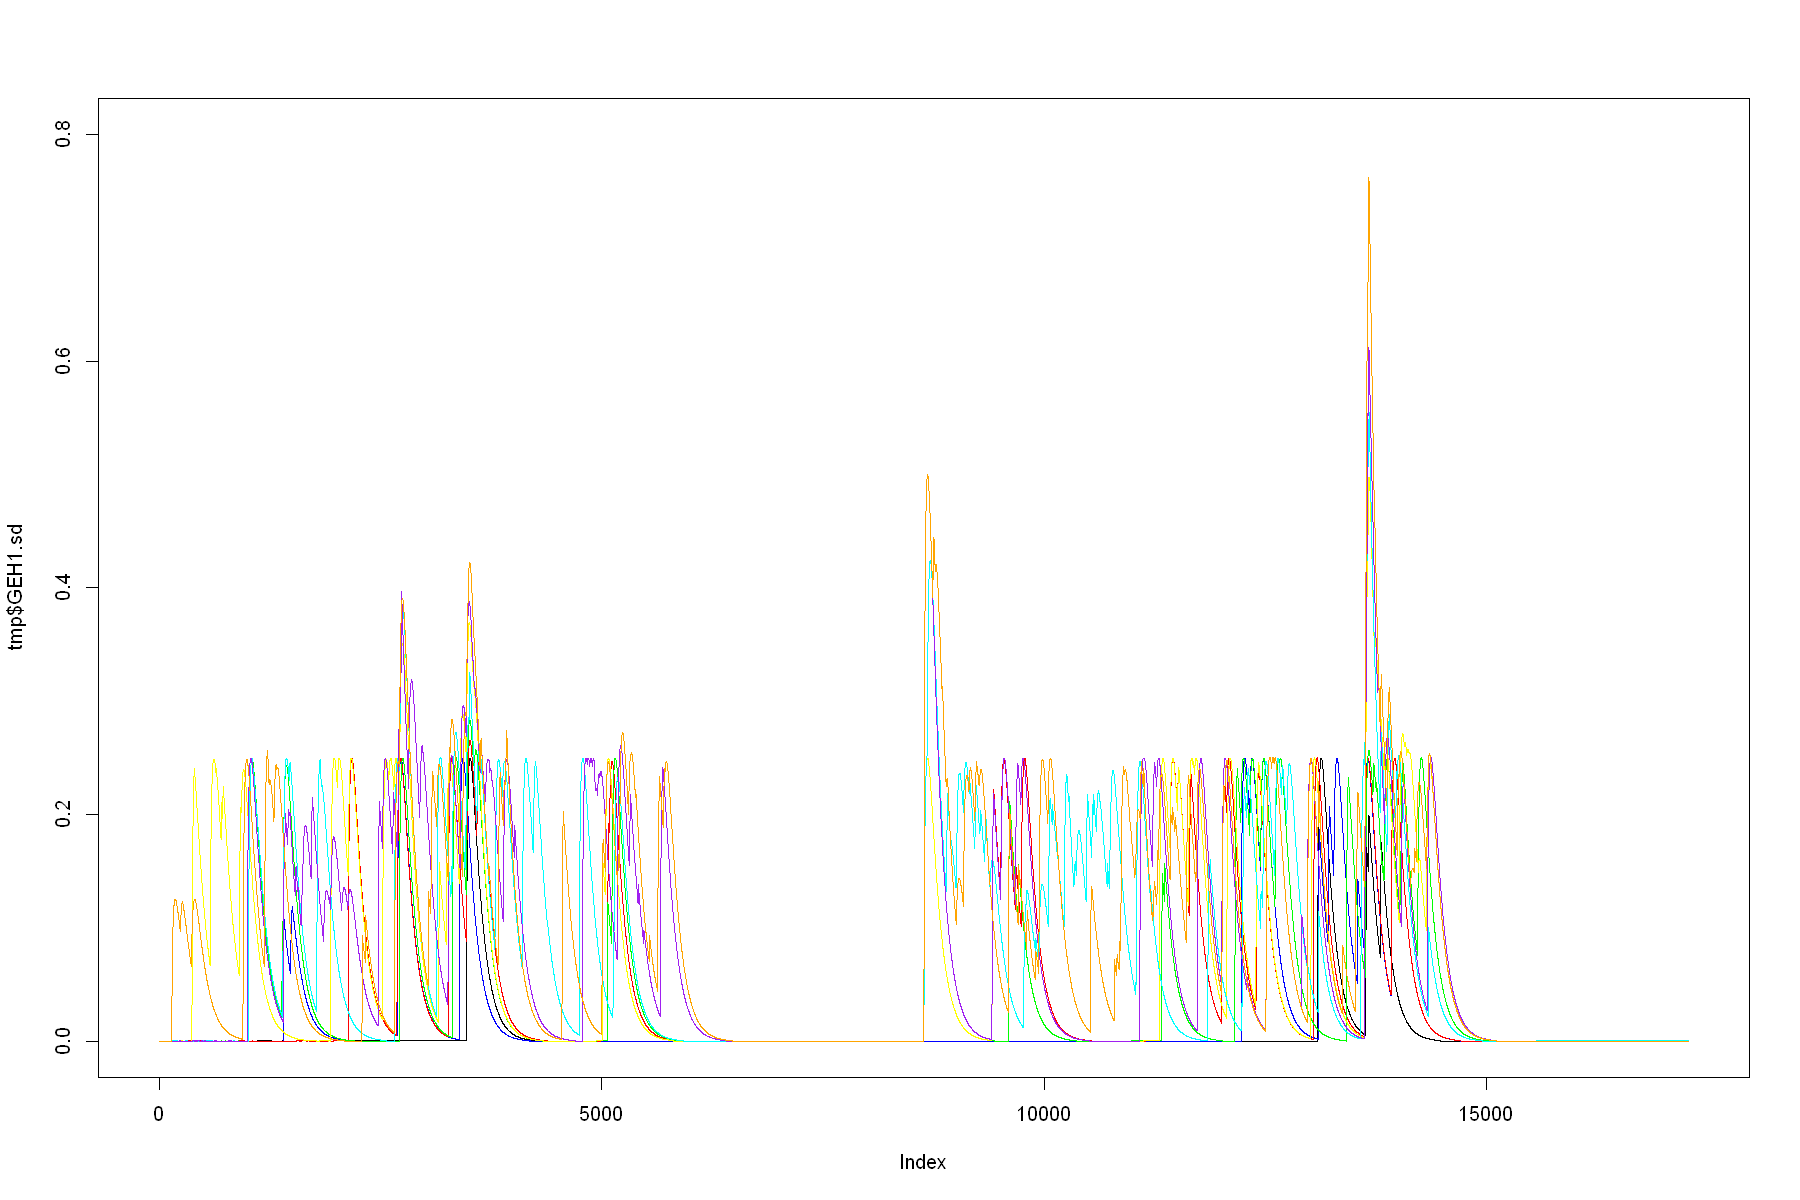

In [11]:
options(repr.plot.width=15,repr.plot.height=10)
plot(tmp$GEH1.sd,type="l",col="black",ylim=c(0,0.8))
lines(tmp$GEM1.sd,col="blue")
lines(tmp$GEU1.sd,col="red")
lines(tmp$GEZ1.sd,col="green")
lines(tmp$GEH2.sd,col="yellow")
lines(tmp$GEM2.sd,col="cyan")
lines(tmp$GEU2.sd,col="purple")
lines(tmp$GEZ2.sd,col="orange")

In [15]:
tmp = pmids[[1]]
print(colnames(tmp[,c(6,11,16,21,26,31,36,41)]))
print(colnames(tmp[,42:49]))
print(colnames(tmp[,50:57]))
print(colnames(tmp[,58:85]))

[1] "GEH1.pmid" "GEM1.pmid" "GEU1.pmid" "GEZ1.pmid" "GEH2.pmid" "GEM2.pmid"
[7] "GEU2.pmid" "GEZ2.pmid"
[1] "GEH1.mean" "GEM1.mean" "GEU1.mean" "GEZ1.mean" "GEH2.mean" "GEM2.mean"
[7] "GEU2.mean" "GEZ2.mean"
[1] "GEH1.sd" "GEM1.sd" "GEU1.sd" "GEZ1.sd" "GEH2.sd" "GEM2.sd" "GEU2.sd"
[8] "GEZ2.sd"
 [1] "corr.1"  "corr.2"  "corr.3"  "corr.4"  "corr.5"  "corr.6"  "corr.7" 
 [8] "corr.8"  "corr.9"  "corr.10" "corr.11" "corr.12" "corr.13" "corr.14"
[15] "corr.15" "corr.16" "corr.17" "corr.18" "corr.19" "corr.20" "corr.21"
[22] "corr.22" "corr.23" "corr.24" "corr.25" "corr.26" "corr.27" "corr.28"


In [16]:
nvec = 1
pmids = pmids.preds(pmids,nvec=nvec)

In [17]:
pmid = data.frame(pmids[[1]])
balance.T = 180
balance.step = as.integer(balance.T/dsec)
balance.step

[1] 3

In [19]:
ret.path = get.simple.return(pmid,balance.step)

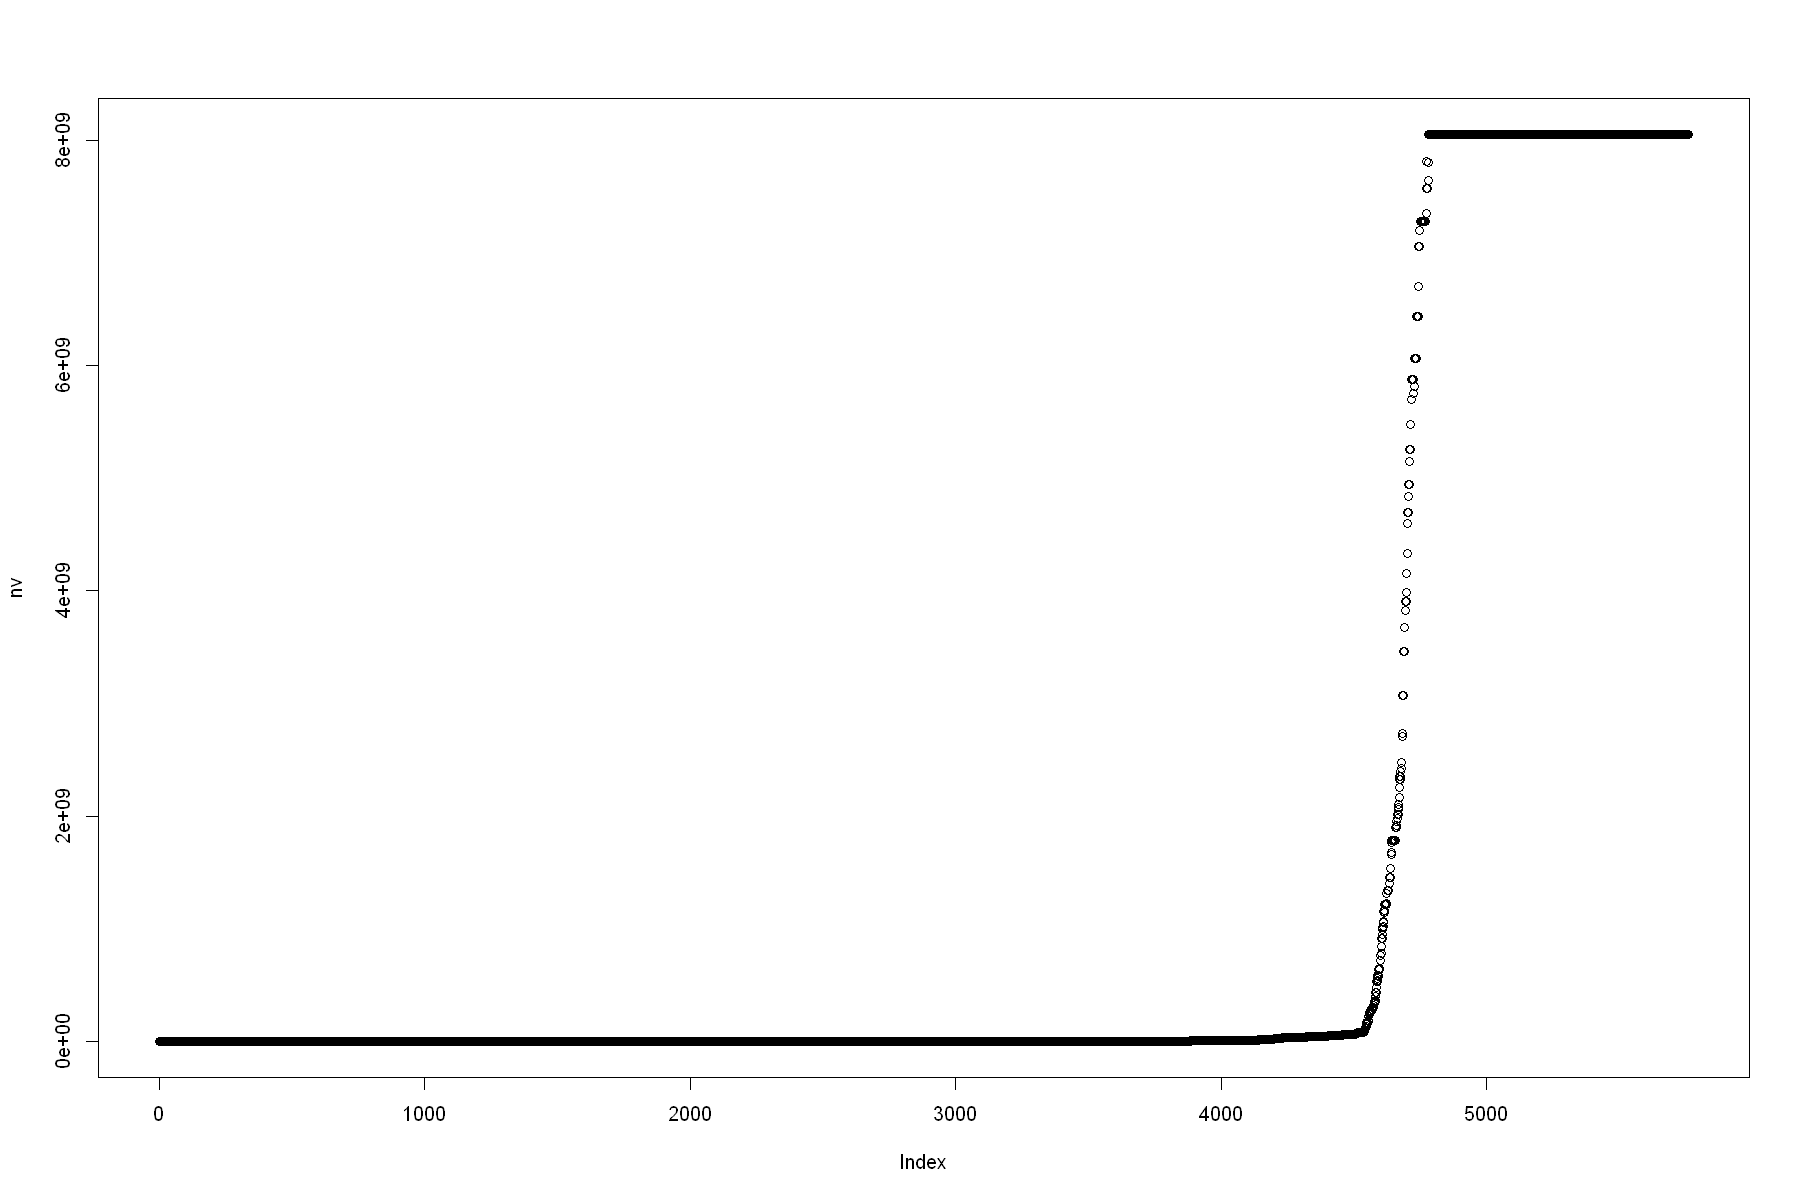

In [20]:
nv = cumprod(1+ret.path)
plot(nv)